In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularPredictor

In [45]:
data = pd.read_csv("data/APPL_raw_data.csv", parse_dates=['Date'])
data['TP'] = data.apply(
    lambda x: np.mean(x[['High', 'Low', 'Close']]), axis=1
)

data.TP = data.TP.shift(-1)
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6457 entries, 0 to 6456
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          6457 non-null   datetime64[ns]
 1   Open          6457 non-null   float64       
 2   High          6457 non-null   float64       
 3   Low           6457 non-null   float64       
 4   Close         6457 non-null   float64       
 5   Volume        6457 non-null   int64         
 6   Dividends     6457 non-null   float64       
 7   Stock Splits  6457 non-null   float64       
 8   CPIAUCSL      6457 non-null   float64       
 9   FEDFUNDS      6457 non-null   float64       
 10  TP            6457 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 605.3 KB


In [42]:
data.TP.shift(-1)

0         0.165176
1         0.135873
2         0.135317
3         0.135635
4         0.134999
           ...    
6453    167.296666
6454    169.506668
6455    166.076665
6456    161.366669
6457           NaN
Name: TP, Length: 6458, dtype: float64

In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=0)
train.head()

In [34]:
predictor = TabularPredictor(label='TP', eval_metric='root_mean_squared_error').fit(train, time_limit=600, presets='best_quality')
predictor.fit_summary()

No path specified. Models will be saved in: "AutogluonModels/ag-20220830_065219/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220830_065219/"
AutoGluon Version:  0.5.2
Python Version:     3.7.10
Operating System:   Linux
Train Data Rows:    5166
Train Data Columns: 10
Label Column: TP
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (180.12130413520288, 0.10005856947730861, 23.97608, 39.59092)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting Au

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2  -0.089480       0.643979   10.899806                0.000648           0.421209            2       True          9
1     ExtraTreesMSE_BAG_L1  -0.090728       0.325667    2.835896                0.325667           2.835896            1       True          7
2   RandomForestMSE_BAG_L1  -0.123710       0.317664    7.642701                0.317664           7.642701            1       True          5
3      WeightedEnsemble_L3  -0.126271      19.515144  440.156380                0.000940           0.236621            3       True         14
4   RandomForestMSE_BAG_L2  -0.126476      19.168609  412.931827                0.324815          13.073637            2       True         12
5          LightGBM_BAG_L1  -0.344076       0.348575   23.322544                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -0.7459767179463535,
  'KNeighborsDist_BAG_L1': -0.6435401706963841,
  'LightGBMXT_BAG_L1': -0.6197329176467976,
  'LightGBM_BAG_L1': -0.34407621944143285,
  'RandomForestMSE_BAG_L1': -0.

<AxesSubplot:xlabel='Date'>

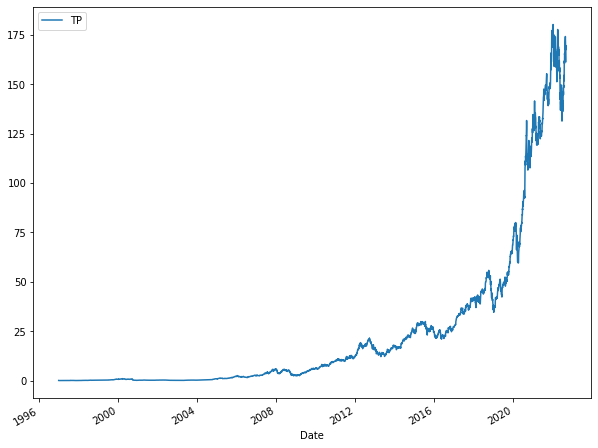

In [26]:
train.plot(x='Date', y='TP', kind='line', figsize=(10,8))

In [35]:
test['prediction'] = predictor.predict(test)

<AxesSubplot:xlabel='Date'>

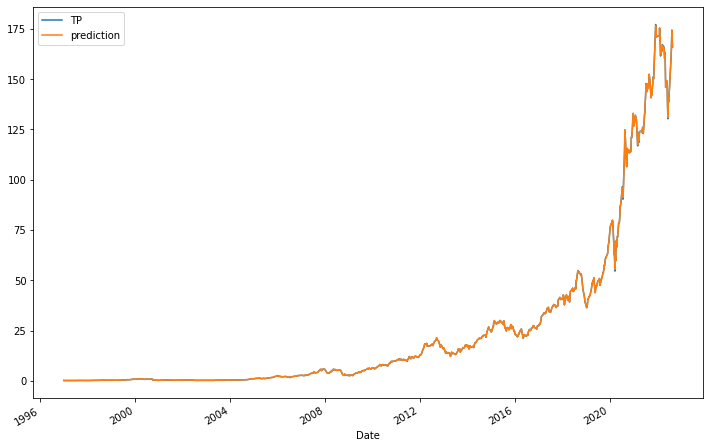

In [37]:
test.plot(x='Date', y=['TP', 'prediction'], kind='line', figsize=(12,8))